In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fonction_stage as st
from numpy.fft import fft 
from numpy.fft import ifft 
import scipy as sp
from scipy.signal import butter, lfilter,  filtfilt, freqz

nombre d'échantillons = 4001
fréquence d'échantillonage= 2000.0 Hz


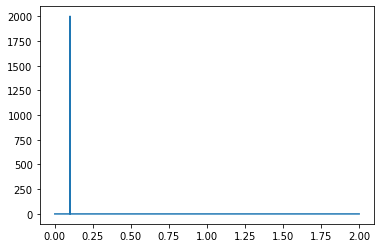

In [2]:
#définition des paramètres 

tsimu=2.001             #secondes
dt=5*10**-4
fs=1/dt              #fréquence d'échantillonage 
N=tsimu/dt
N=int(N)
print("nombre d'échantillons =", N)
print("fréquence d'échantillonage=", fs, "Hz")

temps= np.linspace(0.001,tsimu,N)


tpic=0.1            #décalage temporel 
Npic=tpic/dt
Npic=int(Npic)

amplitude = np.zeros(N)
amplitude[Npic]=2*10**3

plt.figure()
plt.plot(temps,amplitude)

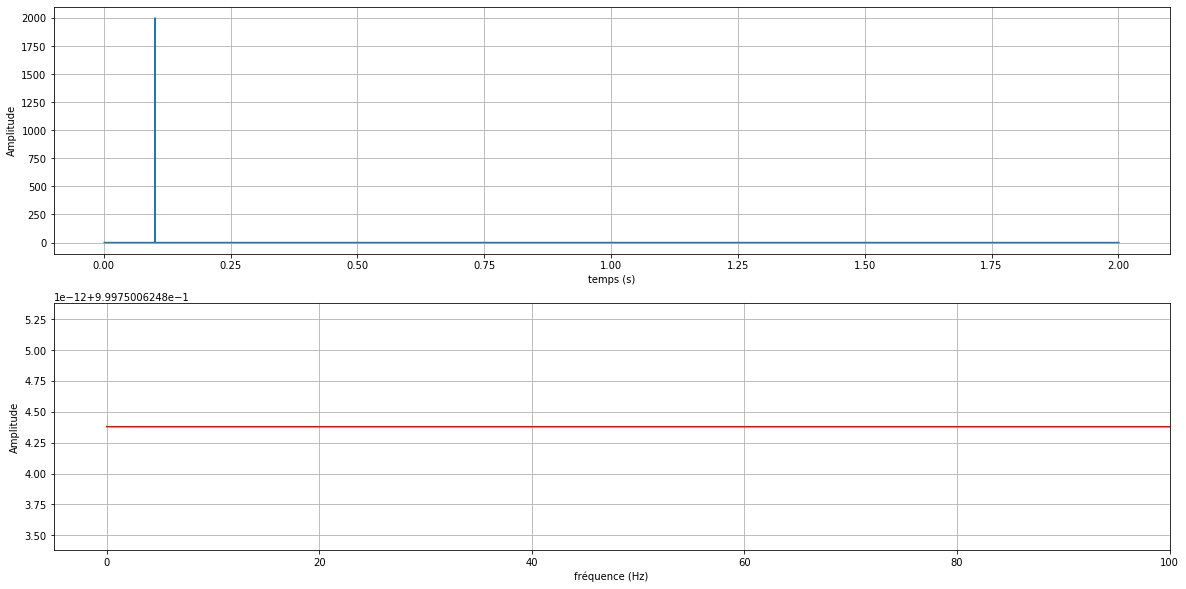

In [3]:
st.plot_fft(amplitude,temps)

In [4]:
def butter_lowpass(fcut, fs, order=5):
    nyq = 0.5 * fs
    cut= fcut / nyq
    b, a = butter(order, cut, btype='low')
    return b, a

def butter_lowpass_filter(data, fcut, fs, order=5):
    b, a = butter_lowpass(fcut,fs, order=order)
    y = lfilter(b, a, data)
    return y


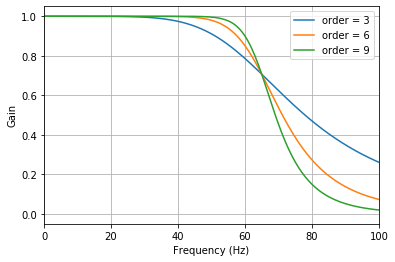

In [5]:
# cutoff frequencies (in Hz).
fcut= 65
    
# Plot the frequency response for a few different orders.
plt.figure(1)

for order in [3, 6, 9]:
    b, a = butter_lowpass(fcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.xlabel('Frequency (Hz)')
plt.xlim(0,100)
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')




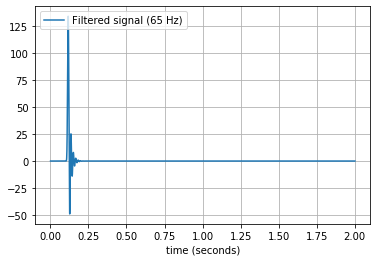

In [6]:
#choose order 
order=9

# Filter a signal.
T = tsimu
nsamples = T * fs
t = temps

x = amplitude

    
plt.figure(2)
y = butter_lowpass_filter(x, fcut, fs, order=order)
plt.plot(t, y, label='Filtered signal (%g Hz)' %fcut)
plt.xlabel('time (seconds)')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
    
plt.show()

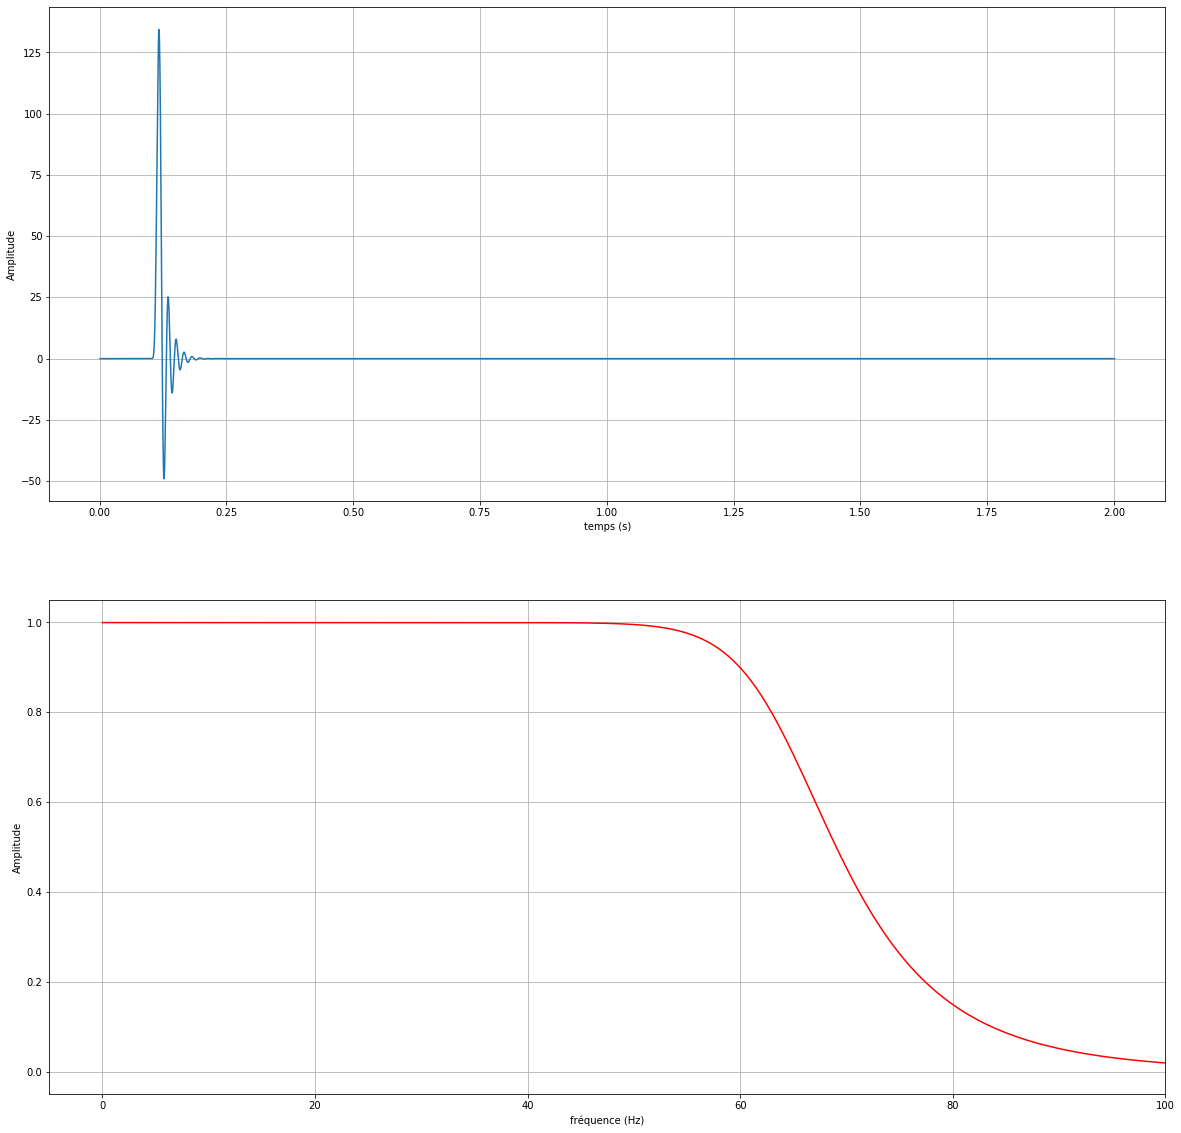

In [7]:
t=temps
signal=y

plt.figure(figsize=(20,20))
plt.subplot(211)
plt.plot(t,signal)
plt.grid()  
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
    
tfd = fft(signal)
N=len(signal)
spectre = np.absolute(tfd)*2/N
T=max(t)

freq=np.arange(N)*1.0/T
    

plt.subplot(212)
plt.plot(freq,spectre,'r')
plt.xlabel('fréquence (Hz)')
plt.ylabel('Amplitude')
plt.xlim(-5,100)
plt.grid()

In [9]:
data=[t,signal]
data=np.transpose(data)
np.savetxt('digue60.sff', data)
